In [2]:
%load_ext autoreload  
%autoreload 2  
!hostname
!pwd
import sys
print(sys.executable)

isola-2080ti-3.csail.mit.edu
/data/vision/phillipi/akumar01/synthetic-mdps/src
/data/vision/phillipi/akumar01/.virtualenvs/synthetic-mdps/bin/python


In [3]:
import os, sys, glob, pickle

from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import optax
from flax import linen as nn
import jax.numpy as jnp
from flax.training.train_state import TrainState
import jax


In [4]:
from compile_experiment import envs_train, envs_test

In [5]:
envs_train

['name=csmdp;i_d=4;i_s=0;t_a=3;t_c=3;t_l=3;t_s=1;o_d=3;o_c=2;r_c=4;tl=64',
 'name=csmdp;i_d=0;i_s=0;t_a=4;t_c=2;t_l=1;t_s=0;o_d=1;o_c=1;r_c=0;tl=64',
 'name=csmdp;i_d=1;i_s=4;t_a=3;t_c=0;t_l=3;t_s=0;o_d=2;o_c=3;r_c=0;tl=64',
 'name=dsmdp;i_d=1;i_s=3;t_a=3;t_s=3;o_d=0;tl=64',
 'name=dsmdp;i_d=1;i_s=1;t_a=1;t_s=0;o_d=2;tl=64',
 'name=dsmdp;i_d=4;i_s=3;t_a=3;t_s=2;o_d=4;tl=64',
 'name=rf;t_a=3;t_c=4;o_d=0',
 'name=rf;t_a=1;t_c=3;o_d=0',
 'name=rf;t_a=0;t_c=1;o_d=4',
 'zero_act']

2024-02-20 23:28:12.878650: W external/xla/xla/service/gpu/nvptx_compiler.cc:698] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


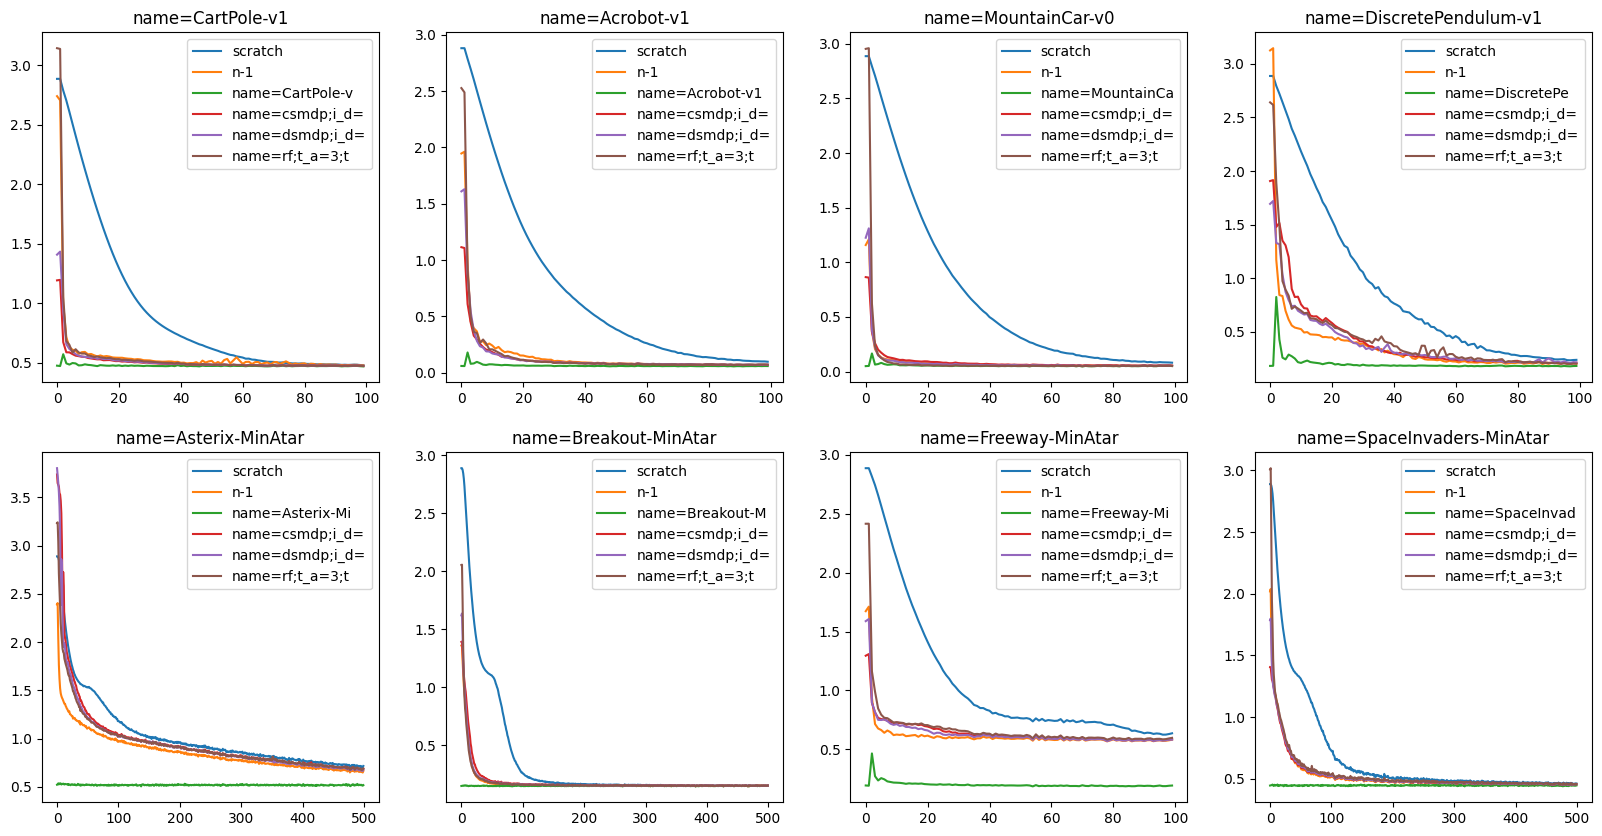

In [6]:
plt.figure(figsize=(20, 10))
for i_plt, env_id_test in enumerate(envs_test):
    plt.subplot(2, 4, i_plt+1)
    plt.title(env_id_test)
    a = [envs_train[0], envs_train[3], envs_train[6]]
    for env_id_train in ['scratch', 'n-1', env_id_test]+a:
        with open(f'../data/exp_icl/test_bc/{env_id_test}/{env_id_train}/metrics_train.pkl', 'rb') as f:
            metrics_train = pickle.load(f)
        plt.plot(metrics_train['loss'], label=env_id_train[:15])
    plt.legend()
    
plt.show()

(0.0, 0.5)

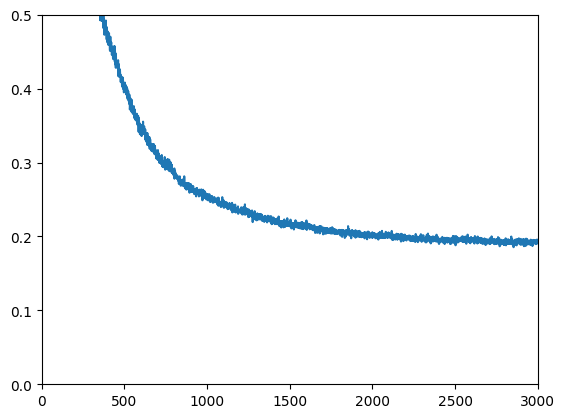

In [14]:
with open(f'../data/exp_icl/train_bc/{"name=Freeway-MinAtar"}/metrics_train.pkl', 'rb') as f:
    metrics_train = pickle.load(f)
plt.plot(metrics_train['loss'])
plt.xlim(0, 3000)
plt.ylim(0,0.5)


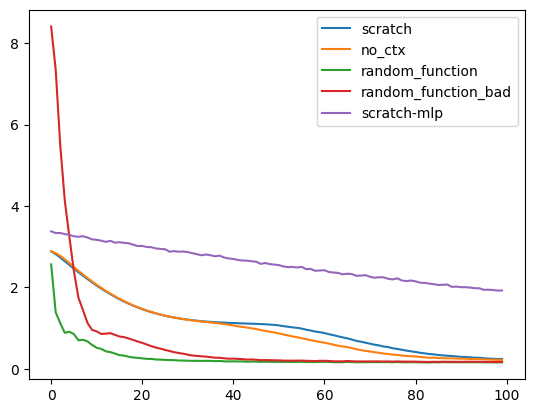

In [172]:
with open(f'../data/exp_icl/test_bc/{"name=Breakout-MinAtar"}/scratch/metrics_train.pkl', 'rb') as f:
    metrics_train = pickle.load(f)
plt.plot(metrics_train['loss'], label='scratch')
with open(f'../data/exp_icl/test_bc/{"name=Breakout-MinAtar"}/no_ctx/metrics_train.pkl', 'rb') as f:
    metrics_train = pickle.load(f)
plt.plot(metrics_train['loss'], label='no_ctx')
with open(f'../data/exp_icl/test_bc/{"name=Breakout-MinAtar"}/random_function/metrics_train.pkl', 'rb') as f:
    metrics_train = pickle.load(f)
plt.plot(metrics_train['loss'], label='random_function')
with open(f'../data/exp_icl/test_bc/{"name=Breakout-MinAtar"}/random_function_bad/metrics_train.pkl', 'rb') as f:
    metrics_train = pickle.load(f)
plt.plot(metrics_train['loss'], label='random_function_bad')
with open(f'../data/exp_icl/test_bc/{"name=Breakout-MinAtar"}/scratch_mlp/metrics_train.pkl', 'rb') as f:
    metrics_train = pickle.load(f)
plt.plot(metrics_train['loss'], label='scratch-mlp')

plt.legend()
plt.show()


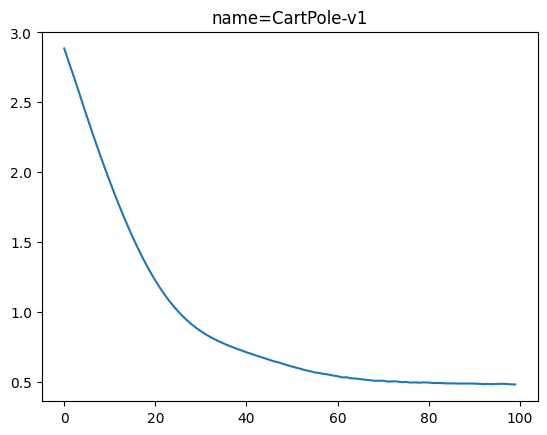

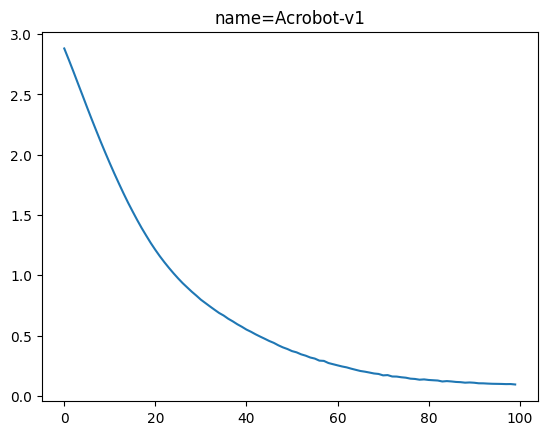

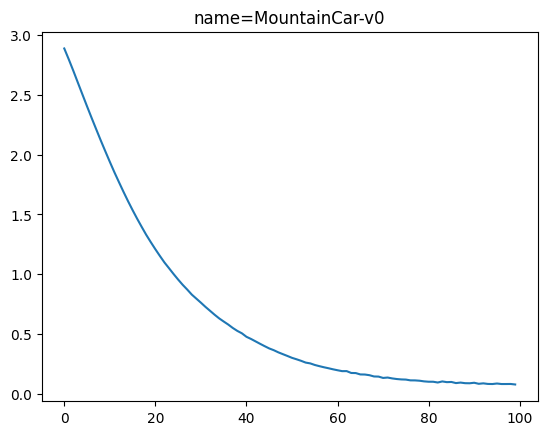

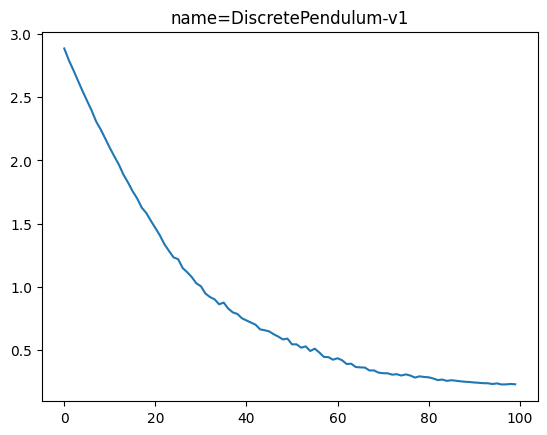

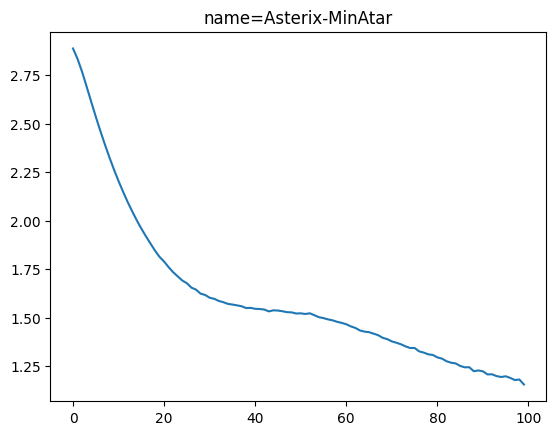

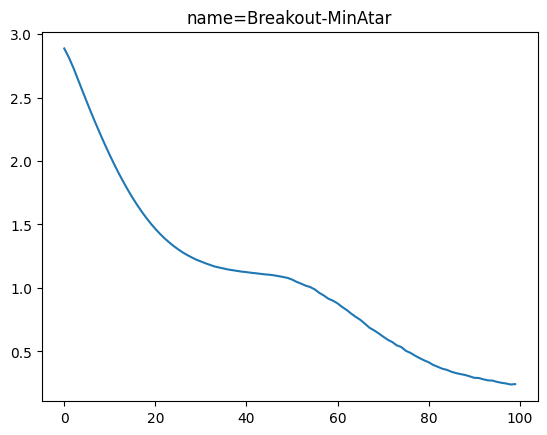

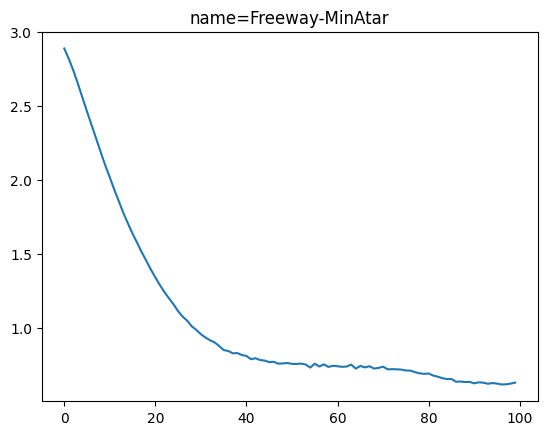

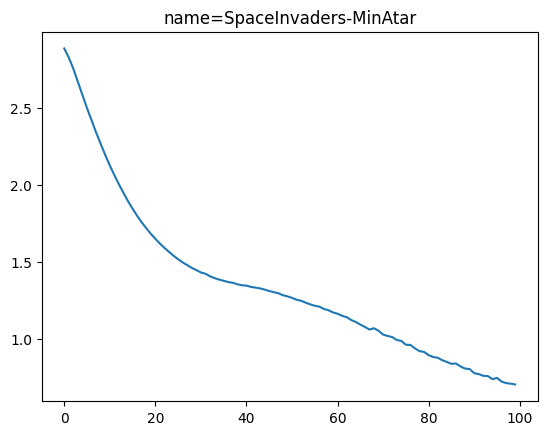

In [38]:
for env_test in envs_test:
    with open(f'../data/exp_icl/test_bc/{env_test}/scratch/metrics_train.pkl', 'rb') as f:
        metrics_train = pickle.load(f)
    plt.plot(metrics_train['loss'])
    plt.title(env_test)
    plt.show()

In [40]:
rng = jax.random.PRNGKey(0)

In [133]:
logits = jax.random.normal(rng, (100, 32))*2
log_probs = jax.nn.log_softmax(logits, axis=-1)
probs = jnp.exp(log_probs)
entr = -(probs*log_probs).sum(axis=-1)
ppl = jnp.exp(entr)
ppl.mean()


Array(8.902796, dtype=float32)

In [142]:
with open("../data/exp_icl/train_bc/random_function/metrics_train.pkl", "rb") as f:
    a = pickle.load(f)

(2000, 128)


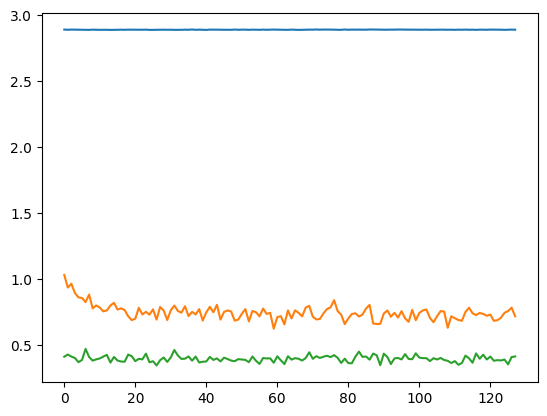

In [152]:
print(a['ce'].shape)
# plt.plot(np.mean(a['ce'], axis=-1))
plt.plot(a['ce'][0])
plt.plot(a['ce'][100])
plt.plot(a['ce'][-1])

